Het pdok-dataset bestaat uit een viertal kolommen, elk met eigen attributten.

Perdioden is het jaartal waarin de gemiddelde huisprijs is gemeten.
Regio's is de regio waar de gegevens van de gemiddelde huisprijs bekent zijn.
Gemiddelde verkoopprijs (euro) is de hoogte van de gemiddelde huisprijs in een bepaalde regio en bepaalde periode.

In [2]:
from WFS import wfs_kadaster
import matplotlib
data = wfs_kadaster("https://geodata.nationaalgeoregister.nl/bag/wfs","bag:pand")

In [3]:
data

,id,identificatie,bouwjaar,status,gebruiksdoel,oppervlakte_min,oppervlakte_max,aantal_verblijfsobjecten,actualiteitsdatum,geometry
0,pand.1,3100000117485,1991,Pand in gebruik,woonfunctie,68,77,15,None,"POLYGON Z ((254059.737 593504.637 0.000, 25405..."
1,pand.2,3100000117486,1970,Pand in gebruik,woonfunctie,89,89,21,None,"POLYGON Z ((253822.701 593455.662 0.000, 25382..."
2,pand.3,3100000117487,1994,Pand in gebruik,None,0,0,0,None,"POLYGON Z ((249943.307 593511.272 0.000, 24994..."
3,pand.4,3100000117489,1989,Pand in gebruik,overige gebruiksfunctie,8,8,1,None,"POLYGON Z ((252002.100 593526.230 0.000, 25200..."
4,pand.5,3100000117490,1925,Pand in gebruik,woonfunctie,115,115,1,None,"POLYGON Z ((253227.559 593526.493 0.000, 25323..."
...,...,...,...,...,...,...,...,...,...,...
995,pand.996,3100000118634,1976,Pand in gebruik,None,0,0,0,None,"POLYGON Z ((254155.061 592958.378 0.000, 25415..."
996,pand.997,3100000118635,1996,Pand in gebruik,None,0,0,0,None,"POLYGON Z ((253838.546 592954.684 0.000, 25384..."
997,pand.998,3100000118636,1984,Pand in gebruik,None,0,0,0,None,"POLYGON Z ((254077.594 592961.257 0.000, 25407..."
998,pand.999,3100000118637,1971,Pand in gebruik,None,0,0,0,None,"POLYGON Z ((253898.494 592962.912 0.000, 25389..."


In [4]:
#data['gebruiksdoel'].unique()
test = data.gebruiksdoel.drop_duplicates()
test

0                                            woonfunctie
2                                                   None
3                                overige gebruiksfunctie
5                                       industriefunctie
6                            kantoorfunctie, woonfunctie
7                                          winkelfunctie
12                         industriefunctie, woonfunctie
19                                    bijeenkomstfunctie
23                                        kantoorfunctie
70                       logiesfunctie, onderwijsfunctie
73                       industriefunctie, winkelfunctie
106                      bijeenkomstfunctie, woonfunctie
112                  gezondheidszorgfunctie, woonfunctie
128                           winkelfunctie, woonfunctie
130           kantoorfunctie, winkelfunctie, woonfunctie
138       bijeenkomstfunctie, winkelfunctie, woonfunctie
436                 overige gebruiksfunctie, woonfunctie
461    bijeenkomstfunctie, over

In [20]:
data.describe()

,identificatie,bouwjaar,oppervlakte_min,oppervlakte_max,aantal_verblijfsobjecten
count,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000
mean,3.100000e+12,1963.471000,132.49000,160.259000,1.869000
std,3.345195e+02,54.770402,682.15929,719.612771,6.086944
min,3.100000e+12,1150.000000,0.00000,0.000000,0.000000
25%,3.100000e+12,1956.750000,15.00000,15.000000,1.000000
50%,3.100000e+12,1974.000000,79.00000,86.000000,1.000000
75%,3.100000e+12,1989.000000,120.00000,132.250000,1.000000
max,3.100000e+12,2009.000000,18407.00000,18407.000000,110.000000


In [5]:
data['gebruiksdoel'].unique()

array(['woonfunctie', None, 'overige gebruiksfunctie', 'industriefunctie',
       'kantoorfunctie, woonfunctie', 'winkelfunctie',
       'industriefunctie, woonfunctie', 'bijeenkomstfunctie',
       'kantoorfunctie', 'logiesfunctie, onderwijsfunctie',
       'industriefunctie, winkelfunctie',
       'bijeenkomstfunctie, woonfunctie',
       'gezondheidszorgfunctie, woonfunctie',
       'winkelfunctie, woonfunctie',
       'kantoorfunctie, winkelfunctie, woonfunctie',
       'bijeenkomstfunctie, winkelfunctie, woonfunctie',
       'overige gebruiksfunctie, woonfunctie',
       'bijeenkomstfunctie, overige gebruiksfunctie, woonfunctie',
       'bijeenkomstfunctie, gezondheidszorgfunctie, kantoorfunctie, woonfunctie',
       'overige gebruiksfunctie, winkelfunctie, woonfunctie',
       'bijeenkomstfunctie, kantoorfunctie',
       'gezondheidszorgfunctie, winkelfunctie, woonfunctie',
       'industriefunctie, winkelfunctie, woonfunctie',
       'industriefunctie, kantoorfunctie',
       'b

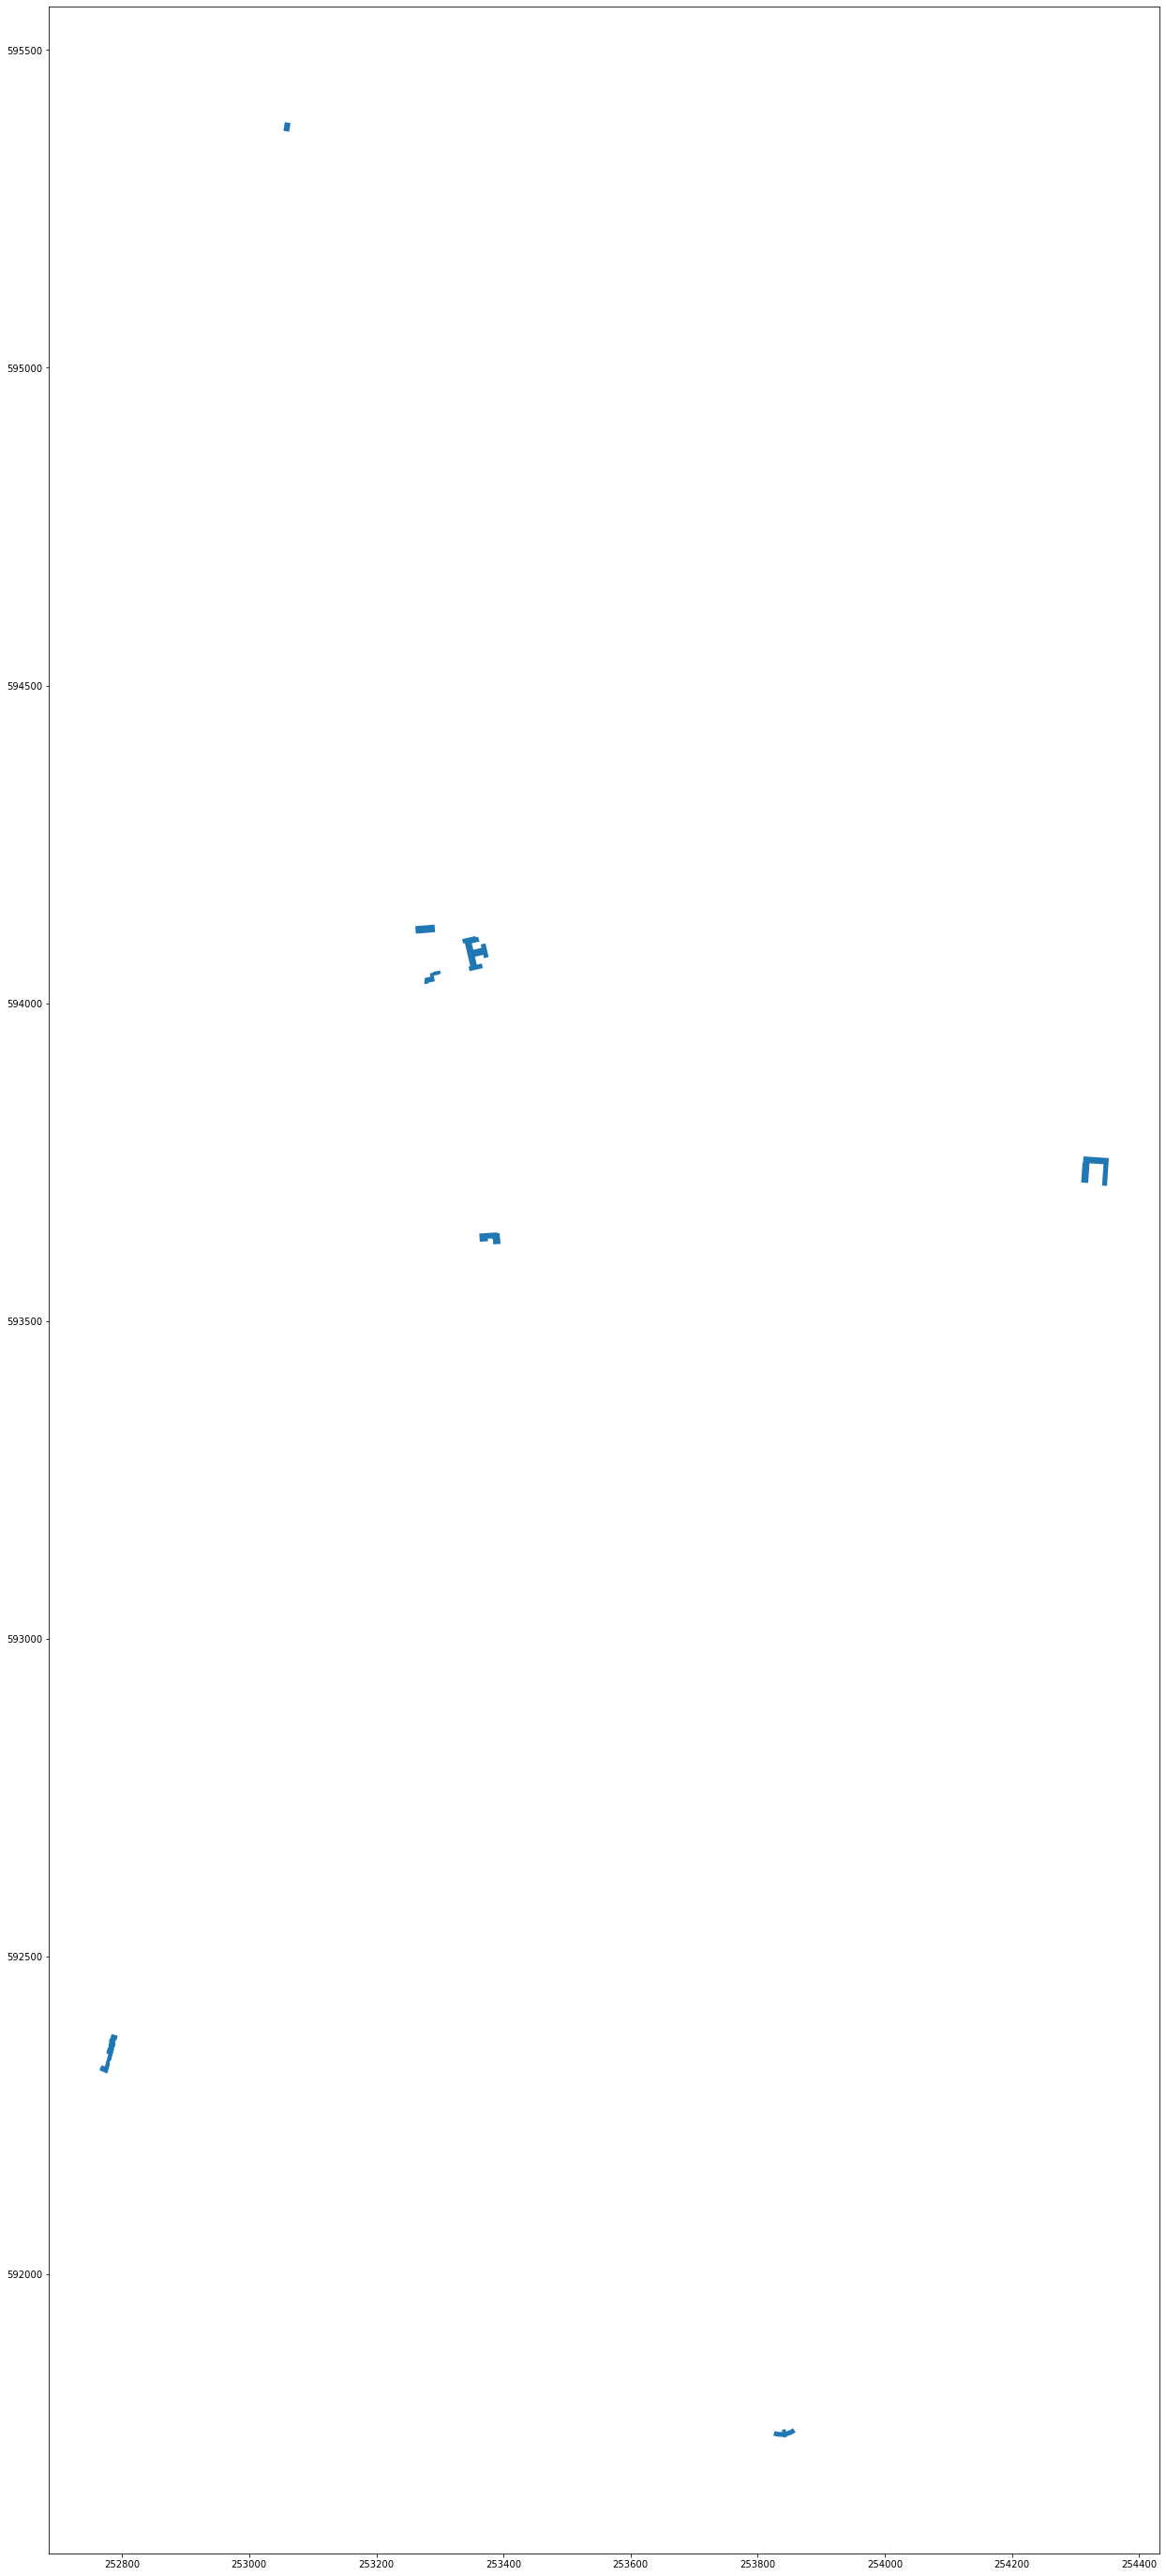

In [16]:
gebruikersdoel = 'kantoorfunctie'
plaatsdata = data.loc[data['gebruiksdoel'] == gebruikersdoel]
plaatsdata.plot(figsize=(50,50))